In [18]:
import tensorflow as tf
import os 

In [19]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

In [22]:
base_dir = '/content/drive/MyDrive/datasets_ai_bootcamp' 


In [24]:
IMAGE_SIZE = 224 
BATCH_SIZE = 64 

datagen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    validation_split=0.2 
   
)

train_generator = datagen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size = BATCH_SIZE, 
    subset='training' 
)
val_generator = datagen.flow_from_directory(  
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    subset='validation'
)


Found 158 images belonging to 2 classes.
Found 38 images belonging to 2 classes.


In [25]:
sample_train_images,_=next(train_generator)

In [26]:
def plotimages(image_arr):
  fig,axes=plt.subplots(1,4,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

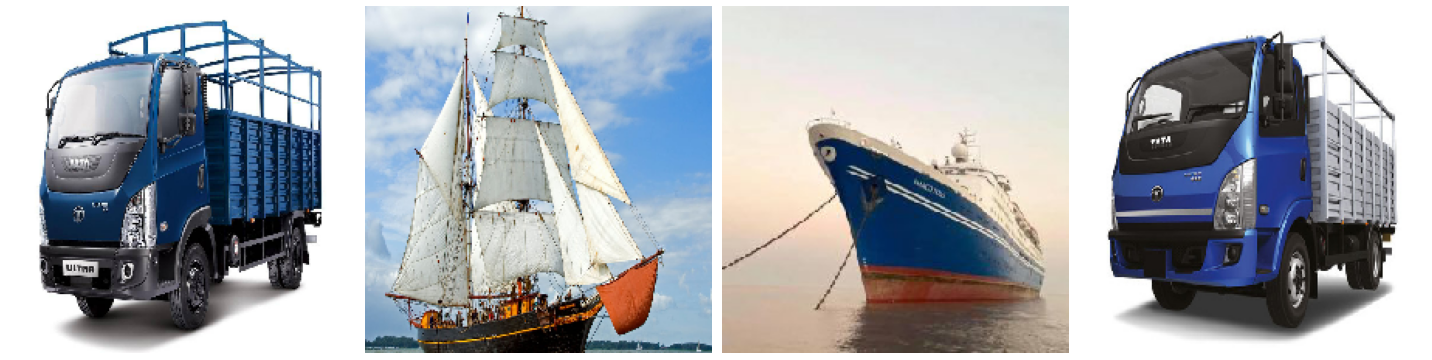

In [27]:
plotimages(sample_train_images[:4])

In [28]:
print(train_generator.class_indices) 
labels = '\n'.join(sorted(train_generator.class_indices.keys()))
with open('labels.txt', 'w') as f: 
    f.write(labels)



{'ships': 0, 'trucks': 1}


In [29]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.MobileNetV2( 
    input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet'
)

In [30]:
base_model.trainable=False 
model = tf.keras.Sequential([ 
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.GlobalAveragePooling2D(), 
  tf.keras.layers.Dense(2, 
                        activation='softmax')
])

In [31]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 2,626,722
Trainable params: 368,738
Non-trainable params: 2,257,984
_________________________________________________________________


In [33]:
epochs = 10 
history = model.fit(
    train_generator, 
    epochs = epochs, 
    validation_data=val_generator
)

Epoch 1/10
3/3 [==============================] - 13s 3s/step - loss: 0.5577 - accuracy: 0.7342 - val_loss: 0.0010 - val_accuracy: 1.0000
Epoch 2/10
3/3 [==============================] - 9s 3s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 4.0112e-04 - val_accuracy: 1.0000
Epoch 3/10
3/3 [==============================] - 8s 3s/step - loss: 2.0075e-04 - accuracy: 1.0000 - val_loss: 0.0022 - val_accuracy: 1.0000
Epoch 4/10
3/3 [==============================] - 9s 3s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.0051 - val_accuracy: 1.0000
Epoch 5/10
3/3 [==============================] - 9s 3s/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 0.0039 - val_accuracy: 1.0000
Epoch 6/10
3/3 [==============================] - 9s 3s/step - loss: 4.4379e-04 - accuracy: 1.0000 - val_loss: 0.0027 - val_accuracy: 1.0000
Epoch 7/10
3/3 [==============================] - 8s 3s/step - loss: 1.0768e-04 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 1.0000
Epoch 8/10
3/3 [========

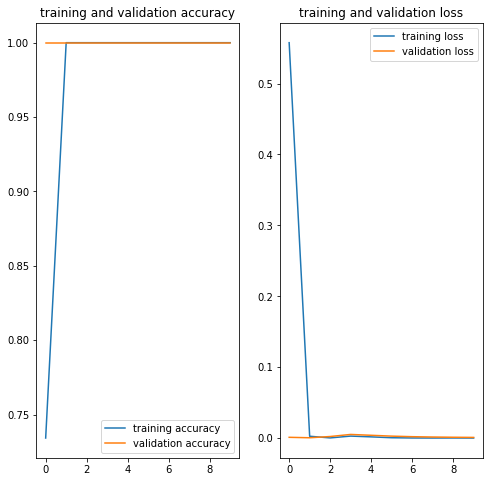

In [35]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='training accuracy')
plt.plot(epochs_range,val_acc,label='validation accuracy')
plt.legend(loc='lower right')
plt.title('training and validation accuracy')

# plt.figure(figsize=(8,8))
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='training loss')
plt.plot(epochs_range,val_loss,label='validation loss')
plt.legend(loc='upper right')
plt.title('training and validation loss')
# figure.savefig('test.png')
plt.savefig('/content/drive/MyDrive/trainkerala_moved_items/acc_fig.png')
plt.show()


In [36]:
model.save('/content/drive/MyDrive/airesultsfolder/my_model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: /content/drive/MyDrive/airesultsfolder/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/airesultsfolder/my_model/assets


In [37]:
model.save('my_model')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


INFO:tensorflow:Assets written to: my_model/assets


INFO:tensorflow:Assets written to: my_model/assets


In [38]:
model.save('my_model.h5')



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


In [ ]:
saved_model_dir = '/content/drive/MyDrive/airesultsfolder' 
tf.saved_model.save(model, saved_model_dir) 



/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.



FOR DEVS: If you are overwriting _tracking_metadata in your class, this property has been used to save metadata in the SavedModel. The metadta field will be deprecated soon, so please move the metadata to a different file.


INFO:tensorflow:Assets written to: /content/drive/MyDrive/airesultsfolder/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/airesultsfolder/assets


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir) 
tflite_model = converter.convert() 

with open('model.tflite', 'wb') as f: 
  f.write(tflite_model)

In [ ]:
from google.colab import files

In [ ]:
files.download('model.tflite')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('labels.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    horizontal_flip=True
)

In [ ]:
train_data_gen = data_gen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),  
    batch_size = BATCH_SIZE,
    shuffle=True 
)

Found 196 images belonging to 2 classes.


In [ ]:
augmented_images=[train_data_gen[1][0][0] for i in range(10)]

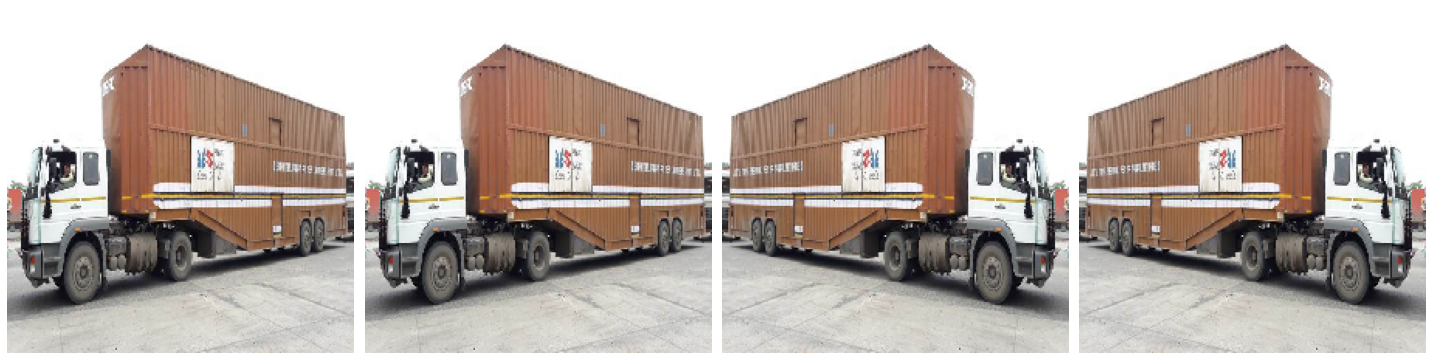

In [ ]:
plotimages(augmented_images)

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    rotation_range=45
)

In [ ]:
train_data_gen = data_gen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    batch_size = BATCH_SIZE,
    
)

Found 196 images belonging to 2 classes.


In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]

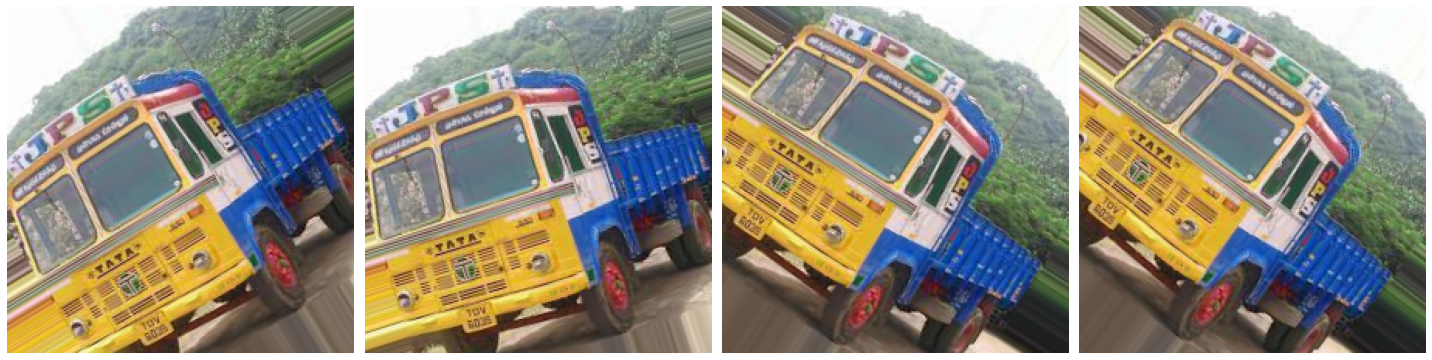

In [ ]:
plotimages(augmented_images)

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    zoom_range=0.5
)

In [ ]:
train_data_gen = data_gen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    batch_size = BATCH_SIZE,
    
)

Found 196 images belonging to 2 classes.


In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]

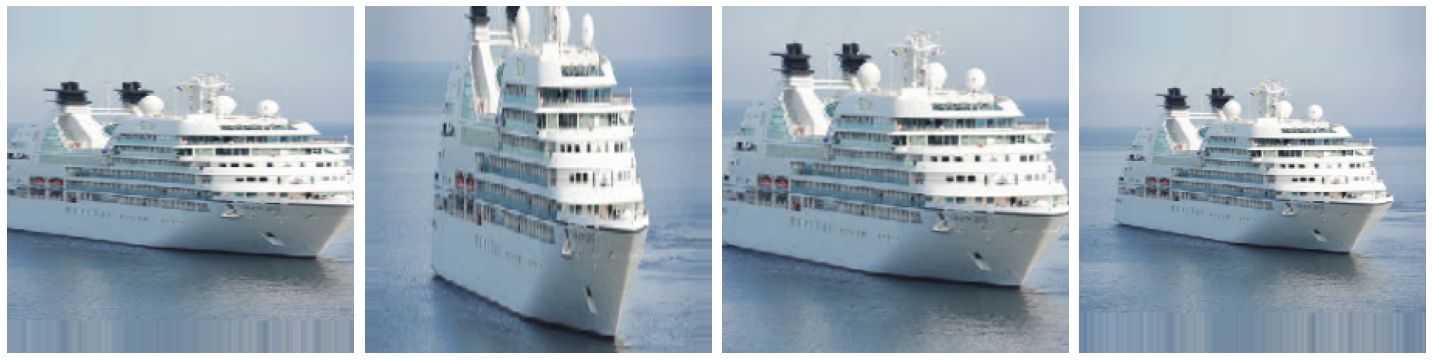

In [ ]:
plotimages(augmented_images)

In [ ]:
data_gen = tf.keras.preprocessing.image.ImageDataGenerator( 
    rescale = 1./255, 
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=True,
    zoom_range=0.5,
    validation_split=0.2
)

In [ ]:
train_data_gen = data_gen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    subset='training'  
)

Found 158 images belonging to 2 classes.


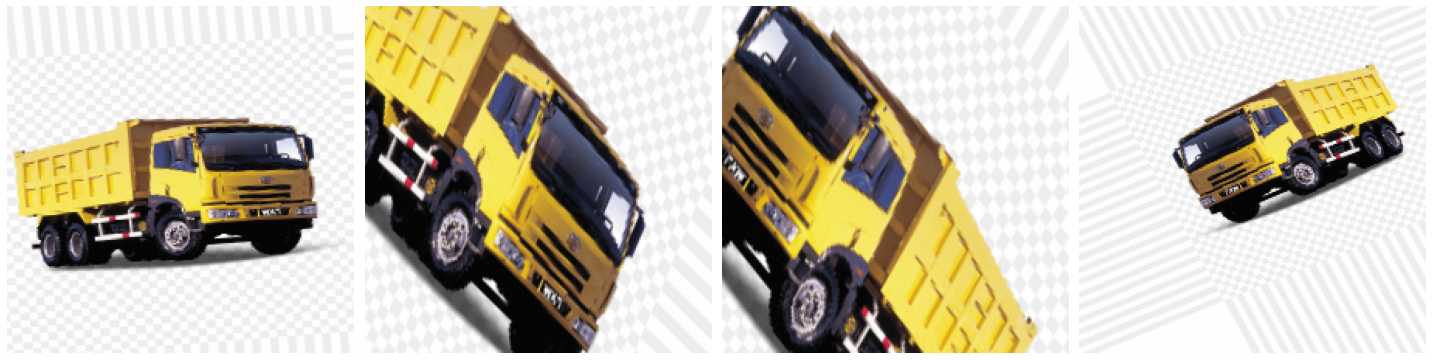

In [ ]:
augmented_images=[train_data_gen[0][0][0] for i in range(5)]
plotimages(augmented_images)

In [ ]:
val_data_gen = data_gen.flow_from_directory( 
    base_dir, 
    target_size=(IMAGE_SIZE, IMAGE_SIZE),
    shuffle=True,
    batch_size = BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  
)

Found 38 images belonging to 2 classes.


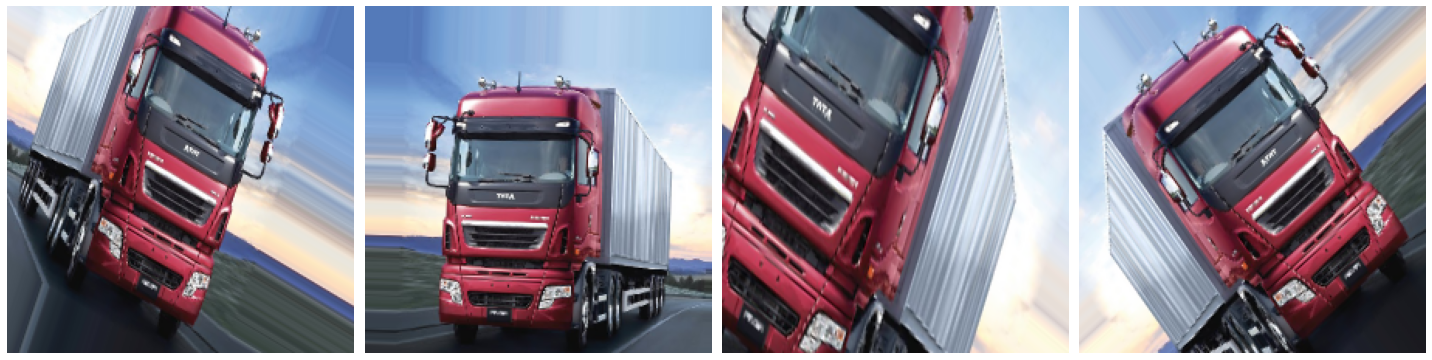

In [ ]:
augmented_images_val=[val_data_gen[0][0][0] for i in range(5)]
plotimages(augmented_images_val)

In [ ]:
sample_train_images_acc,_=next(train_data_gen)

In [ ]:
def plotimages(image_arr):
  fig,axes=plt.subplots(1,4,figsize=(20,20))
  axes=axes.flatten()
  for img,ax in zip(image_arr,axes):
    ax.imshow(img)
    ax.axis('off')
  plt.tight_layout()
  plt.show()

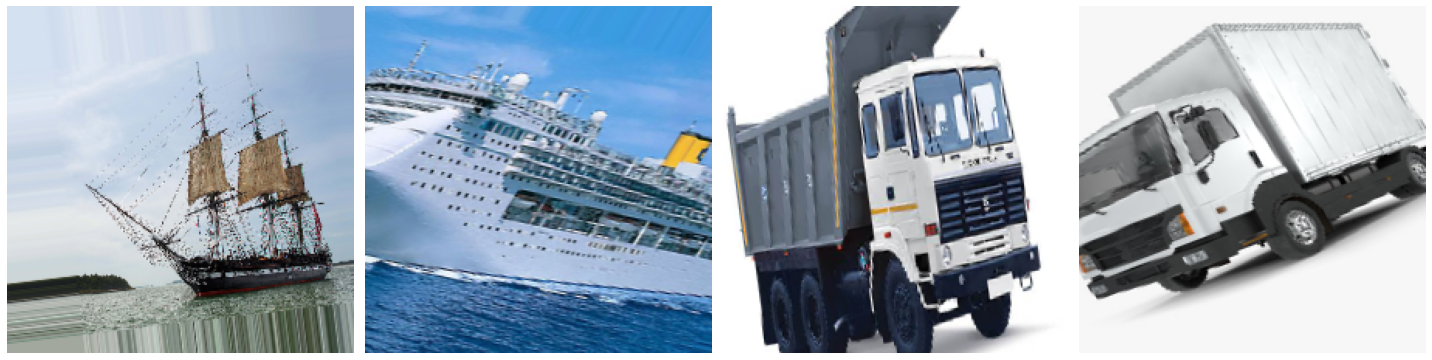

In [ ]:
plotimages(sample_train_images_acc[:4])

In [ ]:
IMG_SHAPE = (IMAGE_SIZE, IMAGE_SIZE, 3) 
base_model = tf.keras.applications.MobileNetV2( 
    input_shape=IMG_SHAPE,
    include_top=False, 
    weights='imagenet'
)

In [ ]:
base_model.trainable=False 
model = tf.keras.Sequential([ 
  base_model,
  tf.keras.layers.Conv2D(32,3, activation = 'relu'), 
  tf.keras.layers.Dropout(0.2), 
  tf.keras.layers.GlobalAveragePooling2D(), 
  tf.keras.layers.Dense(2, 
                        activation='softmax')
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 7, 7, 1280)        2257984   
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 32)          368672    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 32)          0         
_________________________________________________________________
global_average_pooling2d_1 ( (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 2,626,986
Trainable params: 369,002
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
epochs = 20 
history = model.fit(
    train_data_gen,
    epochs = epochs, 
    validation_data=val_data_gen
)

Epoch 1/20
8/8 [==============================] - 34s 4s/step - loss: 0.0717 - accuracy: 0.9801 - val_loss: 0.3024 - val_accuracy: 0.9352
Epoch 2/20
8/8 [==============================] - 27s 3s/step - loss: 0.1259 - accuracy: 0.9647 - val_loss: 0.1336 - val_accuracy: 0.9537
Epoch 3/20
8/8 [==============================] - 32s 5s/step - loss: 0.0842 - accuracy: 0.9713 - val_loss: 0.1569 - val_accuracy: 0.9537
Epoch 4/20
8/8 [==============================] - 32s 4s/step - loss: 0.0747 - accuracy: 0.9801 - val_loss: 0.2078 - val_accuracy: 0.9444
Epoch 5/20
8/8 [==============================] - 27s 3s/step - loss: 0.0607 - accuracy: 0.9845 - val_loss: 0.1350 - val_accuracy: 0.9630
Epoch 6/20
8/8 [==============================] - 27s 3s/step - loss: 0.0531 - accuracy: 0.9823 - val_loss: 0.0939 - val_accuracy: 0.9444
Epoch 7/20
8/8 [==============================] - 27s 3s/step - loss: 0.0578 - accuracy: 0.9801 - val_loss: 0.2565 - val_accuracy: 0.9074
Epoch 8/20
8/8 [==================